In [2]:
import math
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz

import scipy.stats
import scipy.optimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


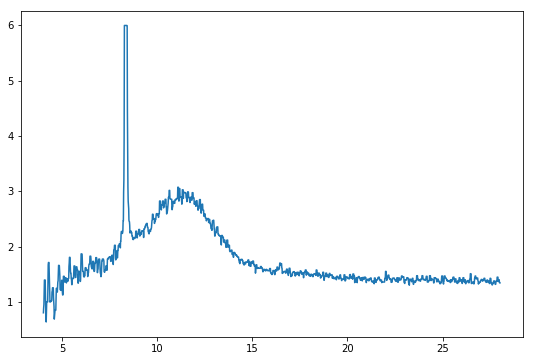

In [7]:
red_4_28 = pd.read_csv('../B(GT) peaks processing/recognition/red data/4_28_red.csv', 
                      sep='\t', decimal=',')

plt.figure(figsize=(9,6))
plt.plot(red_4_28['x'].values, red_4_28['y'].values)

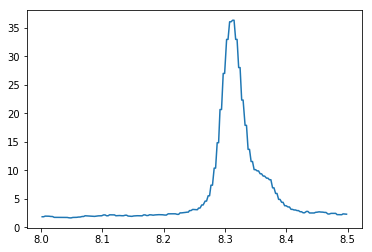

In [6]:
IAS_red = pd.read_csv('../B(GT) peaks processing/recognition/red data/IAS_red.csv', 
                      sep='\t', decimal=',')
plt.plot(IAS_red['x'].values, IAS_red['y'].values)

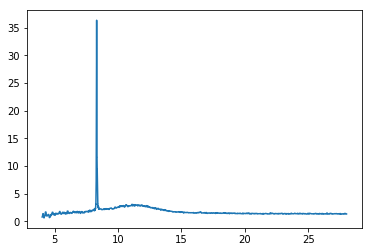

In [26]:
beginning = red_4_28[((red_4_28['x']<8.1))]
middle = IAS_red[((IAS_red['x']>8.1) & (IAS_red['x']<8.65))]
ending = red_4_28[((red_4_28['x']>8.65))]

data = beginning.append(middle).append(ending)

plt.plot(data['x'].values, data['y'].values)

(0, 6)

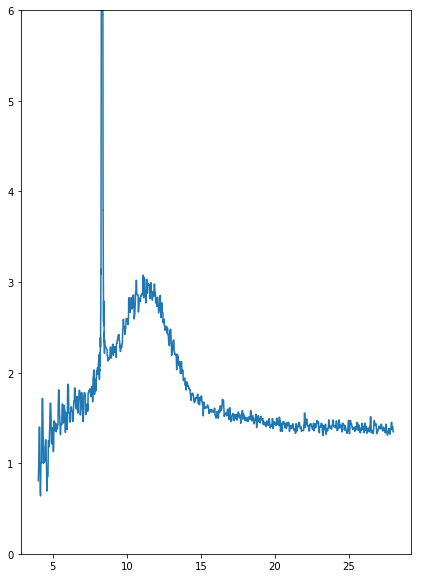

In [27]:
plt.figure(figsize=(7,10))
plt.plot(data['x'].values, data['y'].values)
plt.ylim(0,6)

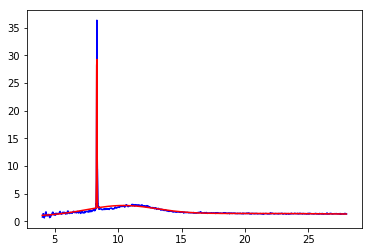

In [28]:
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1)
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3)
    return ret


params = [8.3, 11.5, 25, 1, 1, 1, 1, 1, 1]

fitted_params,_ = scipy.optimize.curve_fit(tri_norm, data['x'].values, data['y'].values, p0=params)

plt.plot(data['x'].values, data['y'].values, c='b')
xx = np.linspace(4, 28, 1000)
plt.plot(xx, tri_norm(xx, *fitted_params), c='r')

(0, 6)

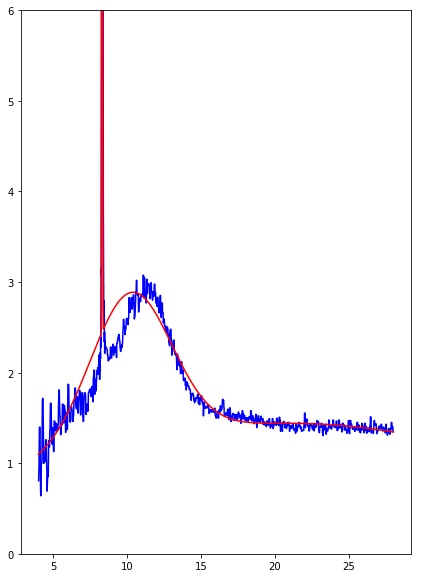

In [29]:
plt.figure(figsize=(7,10))
plt.plot(data['x'].values, data['y'].values, c='b')
plt.plot(xx, tri_norm(xx, *fitted_params), c='r')
plt.ylim(0,6)

### GTR

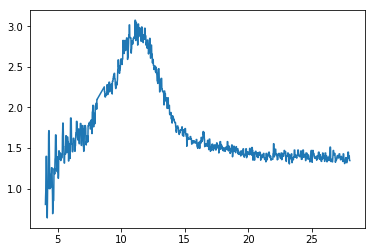

In [30]:
data2 = beginning.append(ending)

plt.plot(data2['x'].values, data2['y'].values)

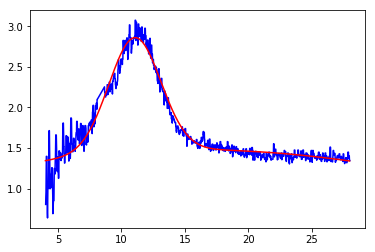

In [41]:
def gauss(x, mu, sigma, k):
    return k*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

def tri_norm2(x, *args):
    m1, m2, s1, s2, k1, k2 = args
    #ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1)
    #ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    ret = gauss(x, m1, s1, k1)
    ret += gauss(x, m2, s2, k2)
    return ret

params2 = [11.5, 25, 1, 1, 1, 1]

fitted_params2,_ = scipy.optimize.curve_fit(tri_norm2, data2['x'].values, data2['y'].values, p0=params2)

plt.plot(data2['x'].values, data2['y'].values, c='b')
plt.plot(xx, tri_norm2(xx, *fitted_params2), c='r')

In [42]:
fitted_params2

array([ 11.05338743,  16.00027301,   2.04836474,  27.2602351 ,
         1.40655398,   1.47787036])

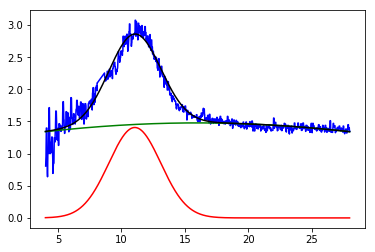

In [64]:
plt.plot(data2['x'].values, data2['y'].values, c='b')
plt.plot(xx, gauss(xx, fitted_params2[0], fitted_params2[2], fitted_params2[4],), c='r')
plt.plot(xx, gauss(xx, fitted_params2[1], fitted_params2[3], fitted_params2[5],), c='g')
plt.plot(xx, tri_norm2(xx, *fitted_params2), c='black')

In [51]:
trapz(gauss(xx, fitted_params2[0], fitted_params2[2], fitted_params2[4]), xx)

7.2198614817828259

### IAS

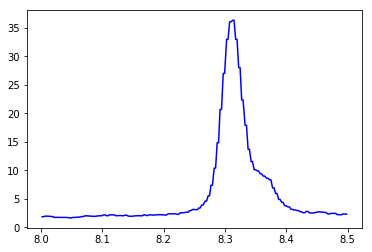

In [53]:
plt.plot(IAS_red['x'].values, IAS_red['y'].values, c='b')

array([  8.31025152e+00,   8.33450485e+00,  -1.41850172e-02,
        -3.95164614e-02,   2.73399015e+01,   8.54260856e+00,
         2.09512335e+00])

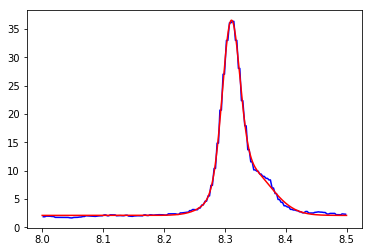

In [56]:
def tri_norm3(x, *args):
    m1, m2, s1, s2, k1, k2, const = args
    #ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1)
    #ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    ret = const
    ret += gauss(x, m1, s1, k1)
    ret += gauss(x, m2, s2, k2)
    return ret

params3 = [8.3, 8.37, 1, 1, 1, 1, 1]

fitted_params3,_ = scipy.optimize.curve_fit(tri_norm3, IAS_red['x'].values, IAS_red['y'].values, p0=params3)

xx3 = np.linspace(8, 8.5, 500)

plt.plot(IAS_red['x'].values, IAS_red['y'].values, c='b')
plt.plot(xx3, tri_norm3(xx3, *fitted_params3), c='r')

fitted_params3

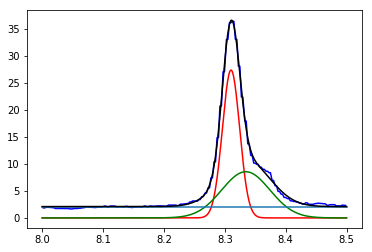

In [65]:
plt.plot(IAS_red['x'].values, IAS_red['y'].values, c='b')
plt.plot(xx3, gauss(xx3, fitted_params3[0], fitted_params3[2], fitted_params3[4],), c='r')
plt.plot(xx3, gauss(xx3, fitted_params3[1], fitted_params3[3], fitted_params3[5],), c='g')
plt.plot(xx3, fitted_params3[6]*np.ones((xx3.shape)))
plt.plot(xx3, tri_norm3(xx3, *fitted_params3), c='black')

In [66]:
trapz(gauss(xx3, fitted_params3[0], fitted_params3[2], fitted_params3[4],), xx3)

0.97211299106006299